# House Prices Prediction


## Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K


tf.keras.backend.clear_session()



print("Modules correctly imported")

Modules correctly imported


## Load the datasets


In [2]:
train_file_path = "data_houses/train.csv"
test_file_path = "data_houses/test.csv"

dataset_train0 = pd.read_csv(train_file_path, header=0,sep=',')
dataset_test = pd.read_csv(test_file_path,header=0,sep=',')

display(dataset_train0.head(5))

dataset_train = dataset_train0.sample(frac=0.8,axis=0)
dataset_val = dataset_train0.drop(dataset_train.index)

X_train = dataset_train.drop(['Id','SalePrice'],axis=1)
Y_train = dataset_train['SalePrice']
X_val = dataset_val.drop(['Id','SalePrice'],axis=1)
Y_val = dataset_val['SalePrice']

X_test = dataset_test.drop(['Id'],axis=1)

print("Train set shape: ",X_train.shape)
print("Validation set shape: ",X_val.shape)
print("Test set shape: ",X_test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train set shape:  (1168, 79)
Validation set shape:  (292, 79)
Test set shape:  (1459, 79)


## Data exploration and missing values visualisation

In [3]:
print('\n Labels with NaN values in X_train, X_val and X_test')
print(X_train.isna().sum()[X_train.isna().sum()>0].index)
print(X_val.isna().sum()[X_val.isna().sum()>0].index)
print(X_test.isna().sum()[X_test.isna().sum()>0].index)

# Let's deal with NaN values that are allowed by the data description
Labels_with_NaN_values_allowed = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for label in Labels_with_NaN_values_allowed:
    X_train[label].fillna('None',inplace=True)
    X_val[label].fillna('None',inplace=True)
    X_test[label].fillna('None',inplace=True)
    
print('\n After correction where NaN values are allowed')
print(X_train.isna().sum()[X_train.isna().sum()>0].index)
print(X_val.isna().sum()[X_val.isna().sum()>0].index)
print(X_test.isna().sum()[X_test.isna().sum()>0].index)

# Let's deal with NaN values that are replcaing numerical values
Labels_with_numerical_NaN_values = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
for label in Labels_with_numerical_NaN_values:
    mean = X_train[label].mean()
    X_train[label].fillna(mean,inplace=True)
    X_val[label].fillna(mean,inplace=True)
    X_test[label].fillna(mean,inplace=True)

print('\n After correction where numerical NaN values are replaced by mean')
print(X_train.isna().sum()[X_train.isna().sum()>0].index)
print(X_val.isna().sum()[X_val.isna().sum()>0].index)
print(X_test.isna().sum()[X_test.isna().sum()>0].index)






 Labels with NaN values in X_train, X_val and X_test
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 

## Finalisation of the datasets

In [4]:
electrical_most_frequent = X_train['Electrical'].mode()[0]
MSZoning_most_frequent = X_train['MSZoning'].mode()[0]
Utilities_most_frequent = X_train['Utilities'].mode()[0]
Exterior1st_most_frequent = X_train['Exterior1st'].mode()[0]
Exterior2nd_most_frequent = X_train['Exterior2nd'].mode()[0]
KitchenQual_most_frequent = X_train['KitchenQual'].mode()[0]
Functional_most_frequent = X_train['Functional'].mode()[0]
SaleType_most_frequent = X_train['SaleType'].mode()[0]

X_train['Electrical'].fillna(electrical_most_frequent,inplace=True)
X_test['MSZoning'].fillna(MSZoning_most_frequent,inplace=True)
X_test['Utilities'].fillna(Utilities_most_frequent,inplace=True)
X_test['Exterior1st'].fillna(Exterior1st_most_frequent,inplace=True)
X_test['Exterior2nd'].fillna(Exterior2nd_most_frequent,inplace=True)
X_test['KitchenQual'].fillna(KitchenQual_most_frequent,inplace=True)
X_test['Functional'].fillna(Functional_most_frequent,inplace=True)
X_test['SaleType'].fillna(SaleType_most_frequent,inplace=True)

print('\n After complete correction')
print(X_train.isna().sum()[X_train.isna().sum()>0].index)
print(X_val.isna().sum()[X_val.isna().sum()>0].index)
print(X_test.isna().sum()[X_test.isna().sum()>0].index)


 After complete correction
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


## Transforming classification data into numerical data and normalization

In [5]:
Labels_with_classification_values = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

for label in Labels_with_classification_values:
    X_train[label], mapping = pd.factorize(dataset_train[label], sort=True)
    X_val[label] = pd.Categorical(dataset_val[label], categories=mapping).codes
    X_test[label] = pd.Categorical(dataset_test[label], categories=mapping).codes

# Normalization
for label in X_train.columns:
    mean = X_train[label].mean()
    std = X_train[label].std()
    X_train[label] = (X_train[label]-mean)/std
    X_val[label] = (X_val[label]-mean)/std
    X_test[label] = (X_test[label]-mean)/std


# Search for NaN valmues
print('\n After normalization')
print(X_train.isna().sum()[X_train.isna().sum()>0].index)
print(X_val.isna().sum()[X_val.isna().sum()>0].index)
print(X_test.isna().sum()[X_test.isna().sum()>0].index)




 After normalization
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


## Creating the model

In [6]:
entry_size = X_train.shape[1]
exit_size = 1
print("Entry size: ", entry_size)
print("Exit size: ", exit_size)

model = keras.models.Sequential()
model.add(keras.layers.Input(entry_size, name="InputLayer"))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(1, name='Output'))

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model.compile(optimizer = 'adam',
            loss      = 'mae',
            metrics   = ['mae', 'mse'] )

model.summary()

Entry size:  79
Exit size:  1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10240     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              263168    
                                                                 
 dropout_2 (Dropout)      

## Training the model

In [7]:
save_dir = "./house_price_prediction/best_model.h5"

# Callbacks
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=1, save_best_only=True, monitor= 'val_loss', mode = 'min')


history = model.fit(X_train.astype(np.float32),
                    Y_train.astype(np.float32),
                    epochs          = 70,
                    batch_size      = 10,
                    verbose         = 1,
                    callbacks       = [savemodel_callback],
                    validation_data = (X_val.astype(np.float32), Y_val.astype(np.float32)))
                    

Epoch 1/70
114/117 [============================>.] - ETA: 0s - loss: 79304.4688 - mae: 79304.4688 - mse: 12517217280.0000
Epoch 1: val_loss improved from inf to 31407.33203, saving model to ./house_price_prediction\best_model.h5
117/117 [==============================] - 3s 15ms/step - loss: 78257.6406 - mae: 78257.6406 - mse: 12256638976.0000 - val_loss: 31407.3320 - val_mae: 31407.3320 - val_mse: 3918046976.0000
Epoch 2/70
114/117 [============================>.] - ETA: 0s - loss: 32676.4316 - mae: 32676.4316 - mse: 2102078464.0000
Epoch 2: val_loss did not improve from 31407.33203
117/117 [==============================] - 1s 10ms/step - loss: 32805.8359 - mae: 32805.8359 - mse: 2109116416.0000 - val_loss: 34403.2422 - val_mae: 34403.2422 - val_mse: 3898035968.0000
Epoch 3/70
117/117 [==============================] - ETA: 0s - loss: 36310.0391 - mae: 36310.0391 - mse: 2874911488.0000
Epoch 3: val_loss improved from 31407.33203 to 30245.97266, saving model to ./house_price_predicti

## Evaluation of our model

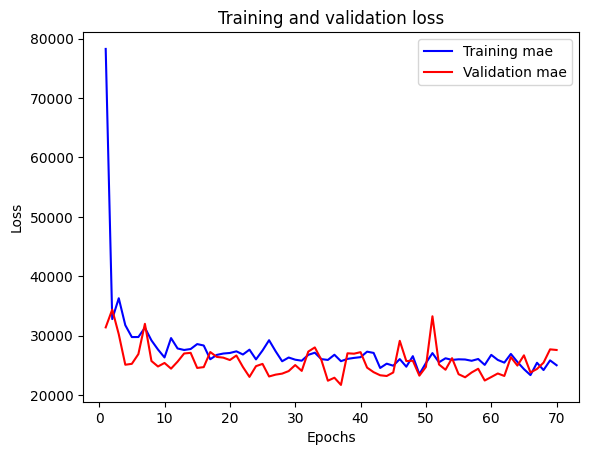

In [8]:
train_mae = history.history['mae']
val_mae   = history.history['val_mae']

epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, 'b', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Percentage error

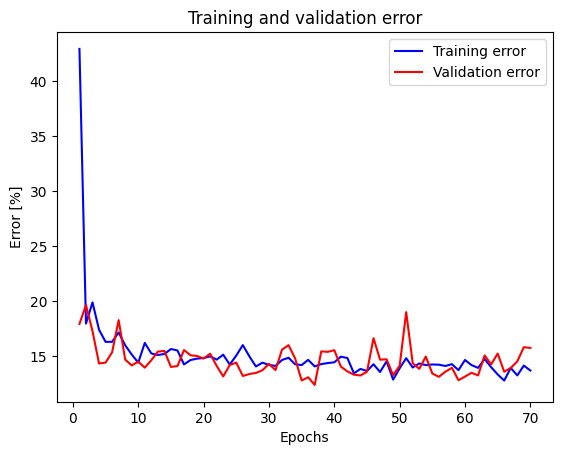

Best porcentage error in validation:  12.419436186712025


In [9]:
mean_price_train = Y_train.mean()
mean_price_val = Y_val.mean()
Percent_error_train = train_mae/mean_price_train*100
Percent_error_val = val_mae/mean_price_val*100

plt.plot(epochs, Percent_error_train, 'b', label='Training error')
plt.plot(epochs, Percent_error_val, 'r', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error [%]')
plt.legend()

plt.show()

print("Best porcentage error in validation: ", min(Percent_error_val))

## Predictions

In [10]:
# Load the best model
best_model = keras.models.load_model(save_dir)


predicted_price = best_model.predict(X_test.astype(np.float32))
solution = pd.DataFrame({'Id': dataset_test.Id, 'SalePrice': predicted_price.flatten()})
solution.to_csv('house_price_prediction/price_predictions.csv', index=False)

46/46 [==============================] - 0s 4ms/step
